# **NBA Anaysis: Visualisations in Matplotlib**

## Objectives

* Load output data set produced in 03_etl_b.ipynb: nba_finals_and_mvp_1980plus.csv
Produce some visualisations with this data.

## Inputs

* Files used: 
nba_finals_and_mvp_1980plus.csv


## Outputs

* File produced:


## Additional Comments

* This dataset contains essential information about the wins, losses, and MVP awards spanning the long-standing rivalry between the Eastern and Western Conferences in the NBA.  
* Note: columns listed in this dataset:

Year: The year of the NBA Finals. (Integer)
Western Champion: The team that won the Western Conference. (String)
Eastern Champion: The team that won the Eastern Conference. (String)
Result: The result of the NBA Finals. (String)
NBA Champion: The team that won the NBA Finals.(String)
NBA Vice-Champion: The team that lost the NBA Finals.(String)
Final Sweep ? Whether or not the NBA Finals was a sweep. (Boolean)
MVP Name: The name of the MVP. (String)
MVP Height (m):	The height of the MVP in meters. (Float)
MVP Height (ft): The height of the MVP in feet. (Float)
MVP Position: The position of the MVP. (String)
MVP Team: The team of the MVP. (String)
MVP Nationality: The nationality of the MVP. (String)
MVP status: The status of the MVP (whether the MVP won the Championship, reached the final or not). (String)
First_Name: The first initial of the player in the format first initial followed by "." eg. "M." (String)
Surname: The surname of the player (String)
* Note: data set only has records from 1980 onwards.




---

# Section 1

# Import necessary libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load the dataset

In [12]:
df = pd.read_csv("../data/outputs/nba_finals_and_mvp_1980plus.csv")

# Look at data

In [13]:
df.head()


,index,Year,Western Champion,Eastern Champion,Result,NBA Champion,NBA Vice-Champion,Final Sweep ?,MVP Name,MVP Height (m),MVP Height (ft),MVP Position,MVP Team,MVP Nationality,MVP status,First_Name,Surname
0,30,1980,Los Angeles Lakers,Philadelphia 76ers,4–2,Los Angeles Lakers,Philadelphia 76ers,False,K. Abdul-Jabbar,2.18,7.152231,Center,Los Angeles Lakers,US,Champion,K.,Abdul-Jabbar
1,31,1981,Houston Rockets,Boston Celtics,2–4,Boston Celtics,Houston Rockets,False,J. Erving,2.01,6.594488,Forward,Philadelphia 76ers,US,Not reached Final,J.,Erving
2,32,1982,Los Angeles Lakers,Philadelphia 76ers,4–2,Los Angeles Lakers,Philadelphia 76ers,False,M. Malone,2.08,6.824147,Center,Houston Rockets,US,Not reached Final,M.,Malone
3,33,1983,Los Angeles Lakers,Philadelphia 76ers,0–4,Philadelphia 76ers,Los Angeles Lakers,True,M. Malone,2.08,6.824147,Center,Philadelphia 76ers,US,Champion,M.,Malone
4,34,1984,Los Angeles Lakers,Boston Celtics,3–4,Boston Celtics,Los Angeles Lakers,False,L. Bird,2.06,6.758530,Forward,Boston Celtics,US,Champion,L.,Bird


# Look at shape

In [14]:
df.shape

(39, 17)

# Check data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              39 non-null     int64  
 1   Year               39 non-null     int64  
 2   Western Champion   39 non-null     object 
 3   Eastern Champion   39 non-null     object 
 4   Result             39 non-null     object 
 5   NBA Champion       39 non-null     object 
 6   NBA Vice-Champion  39 non-null     object 
 7   Final Sweep ?      39 non-null     bool   
 8   MVP Name           39 non-null     object 
 9   MVP Height (m)     39 non-null     float64
 10  MVP Height (ft)    39 non-null     float64
 11  MVP Position       39 non-null     object 
 12  MVP Team           39 non-null     object 
 13  MVP Nationality    39 non-null     object 
 14  MVP status         39 non-null     object 
 15  First_Name         39 non-null     object 
 16  Surname            39 non-nu

# Check null values

In [16]:
df.isnull().sum()

index                0
Year                 0
Western Champion     0
Eastern Champion     0
Result               0
NBA Champion         0
NBA Vice-Champion    0
Final Sweep ?        0
MVP Name             0
MVP Height (m)       0
MVP Height (ft)      0
MVP Position         0
MVP Team             0
MVP Nationality      0
MVP status           0
First_Name           0
Surname              0
dtype: int64

# Check for duplicates

In [17]:
df.duplicated().sum()

0

---

# Section 2

# A visualisation in Matplolib of number of MVPs per position in our dataset of : "Guard", "Center", "Forward". We need to count how many are in each position.
# Note that guards are usually broken down into 2 guard positions, Point Guard and Shooting Guard with different emphasis on utility on a team, but this can change depending on the ability of the player. Eg. Allen Iverson was MVP in the year 2000 and at 1.83m his natural position was Point Guard - usually a facilitator creating the play. Iverson was ore like a Shooting Guard combined with Point Guard, carrying the ball up the court but also taking the most number of shots for his team.
# Forwards are broken down into Small Forward and Power Forward (usually larger than the Small Forward). The way the game has evolved it can be that there are just guards and forwards and centers are not the traditional "rim protectors" of the past due to the increase in 3 point shooting as time has gone on.

# Count totals for each unique position. We know there are 3 - Guard, Forward, Center

In [25]:
position_counts = df['MVP Position'].value_counts()

# Create a visualistion to show the breakdown. For these 3 positions, a pie chart is an easy way to see the breakdown.

# Save the pie chart as an image file in the ../data/outputs/images folder
# Saved as png file but other image formats are also available
# dpi=300 for high-resolution output
# bbox_inches='tight' trims extra whitespace

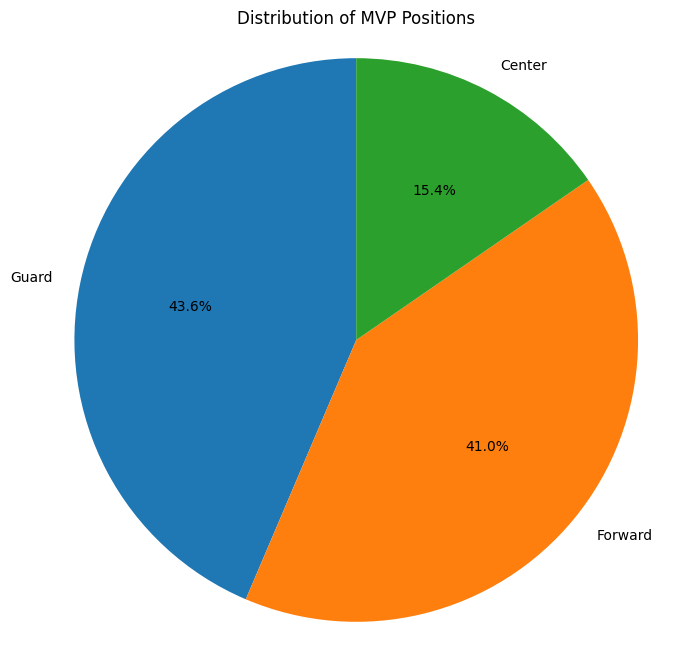

In [26]:
# Create a pie chart to visualize the distribution of MVP positions
plt.figure(figsize=(8, 8))

#  Plotting the pie chart, add percentage labels and ensure the pie chart is circular
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of MVP Positions')
plt.axis('equal')  # Ensures pie is a circle

# Save pie chart as image file (PNG)
plt.savefig('../data/outputs/images/mvp_position_pie_chart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()



# Plot the same information but this time as a bar chart and save to an image file.

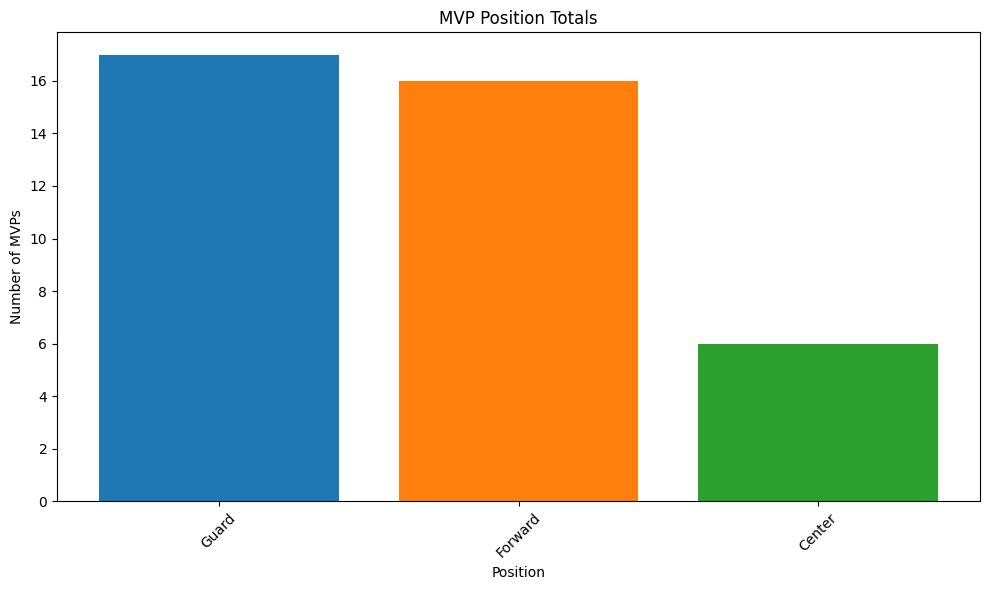

In [36]:
# Define custom colors for each position
color_map = {
    'Guard': '#1f77b4',    # Blue
    'Forward': '#ff7f0e',  # Orange
    'Center': '#2ca02c'    # Green
}

# Extract colors in the same order as position_counts
bar_colors = [color_map[pos] for pos in position_counts.index]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(position_counts.index, position_counts.values, color=bar_colors)
plt.title('MVP Position Totals')
plt.xlabel('Position')
plt.ylabel('Number of MVPs')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the chart as an image file
plt.savefig('../data/outputs/images/mvp_position_bar_chart.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

# Create the same bar chart but with the positions listed inside the bars, which are big enough and would look better. The colours were already defined in the previous chart, we will use them again here for consistency.

# height / 2 places the label vertically centered.
# ha='center', va='center' aligns the text in the middle of the bar.
# color='white' for a contrasting colour


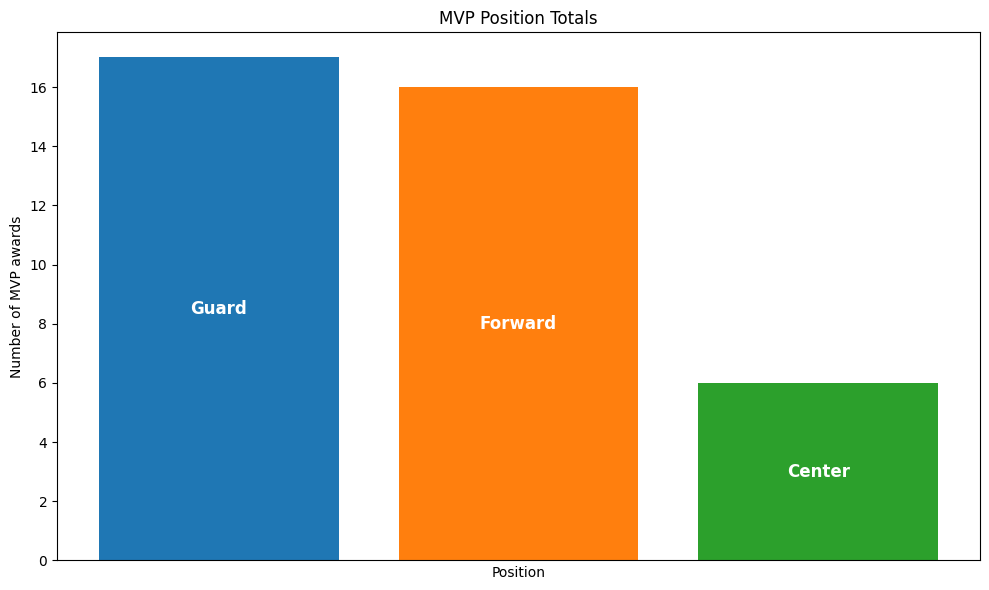

In [37]:
# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(position_counts.index, position_counts.values, color=bar_colors)
plt.title('MVP Position Totals')
plt.xlabel('Position')
plt.ylabel('Number of MVP awards')
#plt.xticks(rotation=45) # Rotates x-axis labels for better readability
plt.xticks([])  # Removes tick labels

plt.tight_layout()

# Add position names inside the bars
for bar, label in zip(bars, position_counts.index):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,  # halfway up the bar
        label,
        ha='center',
        va='center',
        color='white',
        fontsize=12,
        fontweight='bold'
    )

# Save the chart
plt.savefig('../data/outputs/images/mvp_position_bar_chart_labeled_inside.png', dpi=300, bbox_inches='tight')

# Show the chart
plt.show()

# Create the same bar chart, this time horizontal, but with the positions and MVP count listed inside the bars. The colours were already defined in the previous chart, we will use them again here for consistency.

# hide y-axis labels, these are self-explanatory in the chart due to the position name inside the bar.
# use the same 3 colours for position for consistency
# color='white' for a contrasting colour

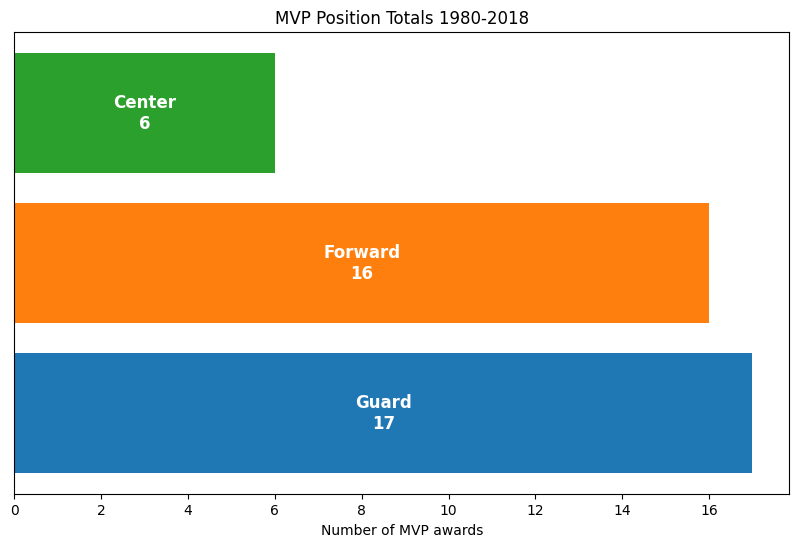

In [38]:
# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(position_counts.index, position_counts.values, color=bar_colors)
plt.title('MVP Position Totals 1980-2018')
plt.xlabel('Number of MVP awards')

# Hide y-axis ticks and labels (optional)
plt.yticks([])  # Removes tick labels
plt.tick_params(axis='y', left=False)  # Removes tick marks

# Add position name and count inside each bar
for bar, label, count in zip(bars, position_counts.index, position_counts.values):
    plt.text(
        count / 2,                      # x-position (center of bar)
        bar.get_y() + bar.get_height() / 2,  # y-position (center of bar)
        f'{label}\n{count}',           # label text
        ha='center',
        va='center',
        color='white',
        fontsize=12,
        fontweight='bold'
    )

# Save and show the chart
plt.savefig('../data/outputs/images/mvp_position_horizontal_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

# Co-pilot suggested that the bar chart can be animated. This is an attempt to animate the above horizontal bar chart.

# Create the same bar chart, this time horizontal, but with the positions and MVP count listed inside the bars. The colours were already defined in the previous chart, we will use them again here for consistency.

# hide y-axis labels, these are self-explanatory in the chart due to the position name inside the bar.
# use the same 3 colours for position for consistency
# color='white' for a contrasting colour

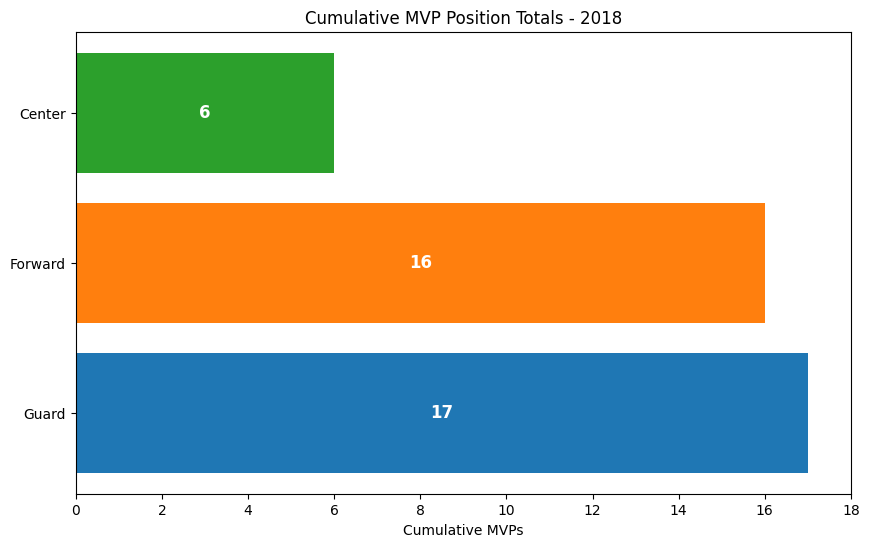

In [ ]:
# Sort by year to ensure proper accumulation
df = df.sort_values('Year')

# Create cumulative counts by year and position
cumulative = (
    df.groupby(['Year', 'MVP Position'])
    .size()
    .unstack(fill_value=0)
    .cumsum()
)

# To keep the same order of positions in the chart with the colours used previously
positions = ['Guard', 'Forward', 'Center']
colors = {
    'Guard': '#1f77b4',
    'Forward': '#ff7f0e',
    'Center': '#2ca02c'
}

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, cumulative.values.max() + 1)
ax.set_xlabel('Cumulative MVPs')

def update(frame):
    ax.clear()
    year = cumulative.index[frame]
    counts = cumulative.loc[year, positions]

    # Draw horizontal bars
    bars = ax.barh(positions, counts.values, color=[colors[pos] for pos in positions])

    # Axis settings
    ax.set_xlim(0, cumulative.values.max() + 1)
    ax.set_xlabel('Cumulative MVPs')
    ax.set_title(f'Cumulative MVP Position Totals - {year}')
    ax.set_yticks(range(len(positions)))
    ax.set_yticklabels(positions)

    # Add counts inside bars
    for bar, count in zip(bars, counts.values):
        ax.text(
            count / 2,
            bar.get_y() + bar.get_height() / 2,
            str(count),
            ha='center',
            va='center',
            color='white',
            fontsize=12,
            fontweight='bold'
        )
    return bars

# Create animation
ani = animation.FuncAnimation(
    fig, update, frames=len(cumulative), repeat=False, interval=800
)

# Save animation as gif (pillow) or MP4 (requires ffmpeg installed) - note that it is better to view the gif file to see the animation easily.
ani.save('../data/outputs/images/cumulative_mvp_position_over_time.gif', writer='pillow', dpi=300)

plt.show()

# Make a scatter type chart showing the height of the winning MVP by year, with the 3 colours indicating their position

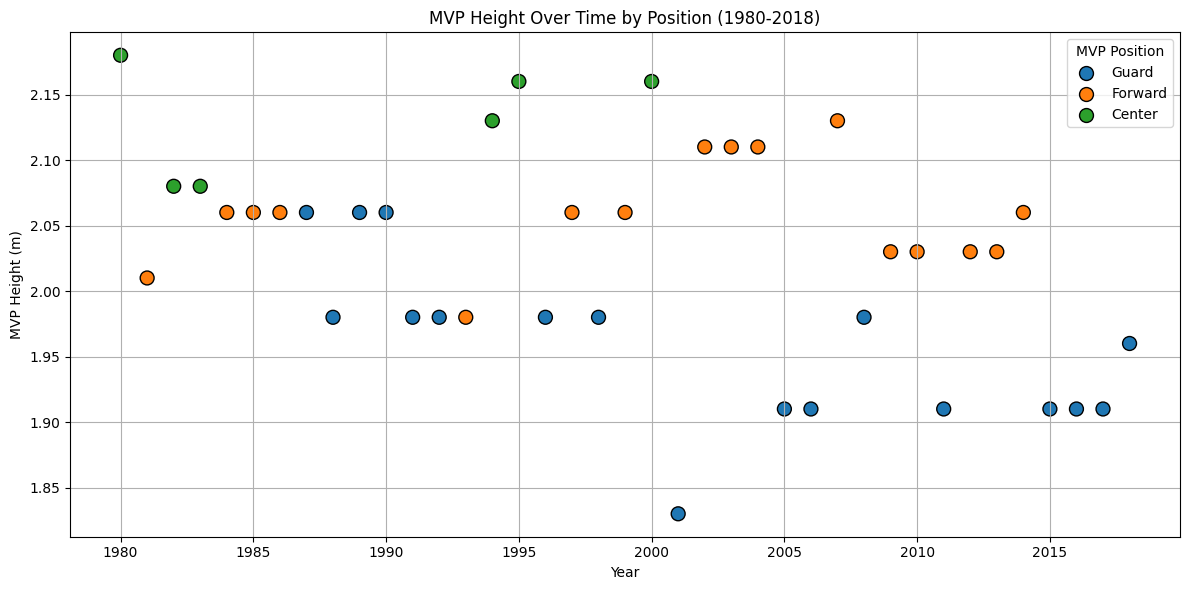

In [ ]:
# Map colours to each row - colour map was defined earlier
df['Color'] = df['MVP Position'].map(color_map)

# Create the plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Year'], df['MVP Height (m)'], c=df['Color'], s=100, edgecolors='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('MVP Height (m)')
plt.title('MVP Height Over Time by Position (1980-2018)')

# Add legend to show the viewer which colour corresponds to which position
for position, color in color_map.items():
    plt.scatter([], [], c=color, label=position, s=100, edgecolors='black')
plt.legend(title='MVP Position')

plt.grid(True)
plt.tight_layout()

#save to an external png image file
plt.savefig('../data/outputs/images/mvp_height_by_position.png', dpi=300)

#show the plot
plt.show()

Note: an aside, before 1980, the Center position had won all but 4 MVP awards, so it is interesting to see how the Guard and Forward positions have won more MVP awards since 1980. The pre-1980 data may be due to the dominance of All-Time Great Centers in Bill Russell (11 Championships, a record), Wilt Chamberlain (many individual records but usually beaten in the Finals by Russell), and Kareem Abdul-Jabbar amongst others.

From the 1987, guards became regular MVP winners, due Magic Johnson and Michael Jordan. Earvin "Magic" Johnson was the architect of the "Showtime" Los Angeles Lakers with an arsenal of "no look" passes and unparalleled court vision due to having the size of a Forward (at 6'9). Isiah Thomas, one of the best point guards of the time and an All-Time Great noted that Magic Johnson had the same passing lanes as everyone else but 1 more, above the defenders head because he was taller than everyone in his position (usually 6' - 6'4). Michael Jordan won 5 MVP awards and was the normal height for his position (6'6), and a very spectacular player, who said he'd admired forward Julius "Dr. J" Erving, himself a previous MVP winner. Jordan performed similar high-flying feats while being the top scorer in the league for 10 years, combined with being the best defensive player in his position.

After the year 2000, when Shaquille "Shaq" O'Neal won the MVP award, no center has won it since. Does this show a change in the rules to deal with Shaq's dominance ? Or does it show a change in tactics over time with the emphasis on other positions ? For future investigation, we could look into how the positions have changed and how they are played now than they were in previous decades. We now see some centers take 3 point shots, while in the past they stayed near the ring to block shots and get rebounds to start attacks. 

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
